## Data Generation

QPSK with CFO Rotation:

Keep channel constant but rotate the signal at rate $\omega$. 

Repeat for multiple channels

In [1]:
import numpy as np
import scipy.signal as sig
from numpy import linalg as LA
import matplotlib.pyplot as plt

# Create training and test data for the NN

epochs = 2000
batch_size = 100

# number of random channels that will be trained and tested on
num_train=epochs*batch_size
num_test=batch_size

# assume we know the channel_length
channel_length = 2
# define the rate of angular frequency change for CFO
# omega = 1/(batch_size*4) # radians / sample
omega = 1/50
# omega = 0

# assume the channel affects real and imaginary the same
channel_train = np.zeros((num_train,channel_length))
channel_test = np.zeros((num_test,channel_length))

data_length = 200

# QPSK
data_train_orig_real = np.zeros((num_train, data_length+1))
data_train_orig_real_cfo = np.zeros((num_train, data_length+1))
data_train_real = np.zeros((num_train,data_length+1))
data_test_orig_real = np.zeros((num_test,data_length+1))
data_test_orig_real_cfo = np.zeros((num_test,data_length+1))
data_test_real = np.zeros((num_test,data_length+1))
data_train_orig_img = np.zeros((num_train, data_length+1))
data_train_orig_img_cfo = np.zeros((num_train, data_length+1))
data_train_img = np.zeros((num_train,data_length+1))
data_test_orig_img = np.zeros((num_test,data_length+1))
data_test_orig_img_cfo = np.zeros((num_test,data_length+1))
data_test_img = np.zeros((num_test,data_length+1))

for i in range(num_train):
    channel_train[i,:]=np.random.uniform(0,1,channel_length)
    # normalize power of the channel
    channel_train[i] = channel_train[i]/(np.linalg.norm(channel_train[i]))
    
    # real part of data
    data_train_basic = (2*np.random.randint(2,size=data_length)-1)*np.sqrt(2)/2
    data_train_orig_real[i,:]=np.pad(data_train_basic, (0, 1), 'constant')
    
    # imaginary part of data
    data_train_basic = (2*np.random.randint(2,size=data_length)-1)*np.sqrt(2)/2
    data_train_orig_img[i,:]=np.pad(data_train_basic, (0, 1), 'constant')
    
    # rotate data according to cfo
    for j in range(data_length):
        data_train_orig_real_cfo[i,j]=(data_train_orig_real[i,j]*np.cos(omega*j)
                                       -data_train_orig_img[i,j]*np.sin(omega*j))
        data_train_orig_img_cfo[i,j]=(data_train_orig_real[i,j]*np.sin(omega*j)
                                      +data_train_orig_img[i,j]*np.cos(omega*j))
    
    # convolve data with the channel
    data_train_real[i,:]=sig.convolve(data_train_orig_real_cfo[i,:-1], channel_train[i], mode='full')
    data_train_img[i,:]=sig.convolve(data_train_orig_img_cfo[i,:-1], channel_train[i], mode='full')
    
    if i % 10000 == 0:
        print(i)
    

for i in range(0, num_test):
    channel_test[i,:]=np.random.uniform(0,1,channel_length)
    # normalize power to 1
    channel_test[i] = channel_test[i]/(np.linalg.norm(channel_test[i]))
    
    # real part of data
    data_test_basic = (2*np.random.randint(2,size=data_length)-1)*np.sqrt(2)/2
    data_test_orig_real[i,:]=np.pad(data_test_basic, (0, 1), 'constant')
    
    # imaginary part of data
    data_test_basic = (2*np.random.randint(2,size=data_length)-1)*np.sqrt(2)/2
    data_test_orig_img[i,:]=np.pad(data_train_basic, (0, 1), 'constant')
    
    # rotate data according to cfo
    for j in range(data_length):
        data_test_orig_real_cfo[i,j]=(data_test_orig_real[i,j]*np.cos(omega*j)
                                      -data_test_orig_img[i,j]*np.sin(omega*j))
        data_test_orig_img_cfo[i,j]=(data_test_orig_real[i,j]*np.sin(omega*j)
                                     +data_test_orig_img[i,j]*np.cos(omega*j))
    
    # convolve data with the channel
    data_test_real[i,:]=sig.convolve(data_test_orig_real_cfo[i,:-1], channel_test[i], mode='full')
    data_test_img[i,:]=sig.convolve(data_test_orig_img_cfo[i,:-1], channel_test[i], mode='full')

print("Data generation complete.")

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
Data generation complete.


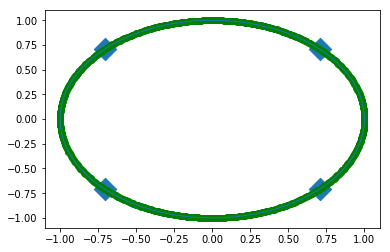

In [2]:
# Illustrate the affect of CFO on symbols
# omega=1/200

plt.figure()
qpsk=np.array([[-1,-1],[-1,1],[1,-1],[1,1]])*np.sqrt(2)/2
qpsk_test_real=np.zeros((batch_size,data_length+1))
qpsk_test_img=np.zeros((batch_size,data_length+1))
qpsk_test_real[:,0]=np.sqrt(2)/2
qpsk_test_img[:,0]=np.sqrt(2)/2

# plot the movement
for i in range(1,data_length):
    qpsk_test_real[:,i]=np.sqrt(2)/2*np.cos(i*omega)-np.sqrt(2)/2*np.sin(i*omega)
    qpsk_test_img[:,i]=np.sqrt(2)/2*np.sin(i*omega)+np.sqrt(2)/2*np.cos(i*omega)
    plt.plot(qpsk[:,0]*np.cos(i*omega)-qpsk[:,1]*np.sin(i*omega), 
             qpsk[:,0]*np.sin(i*omega)+qpsk[:,1]*np.cos(i*omega), 'go')
    
channel_qpsk = np.zeros((batch_size,channel_length))
channel_qpsk[:,0]=1
data_qpsk_real = np.zeros((batch_size,data_length+1))
data_qpsk_img = np.zeros((batch_size,data_length+1))
for j in range(batch_size):
#     channel_qpsk[i,:]=np.random.uniform(0,1,channel_length)
#     # normalize power to 1
#     channel_qpsk[i] = channel_qpsk[i]/(np.linalg.norm(channel_qpsk[i]))
    
    # convolve data with the channel
    data_qpsk_real[j,:]=sig.convolve(qpsk_test_real[j,:-1], channel_qpsk[j], mode='full')
    data_qpsk_img[j,:]=sig.convolve(qpsk_test_img[j,:-1], channel_qpsk[j], mode='full')
    
# plot starting points
plt.scatter(qpsk[:,0],qpsk[:,1],marker='D',s=250)

# plot unit circle
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), linewidth=1)

plt.show()

Simple RNN Equalizer

In [3]:
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
# fix random seed for reproducibility
np.random.seed()

learning_rate = 0.01
decay = 1 - 10*1e-10

batch_size = 100 # num of data streams
input_size = 1 # num of new conv data points to consider
state_size = 4 # num of est data points to use as state

batch_data_placeholder = tf.placeholder(tf.float32, [None, data_length+1])
batch_dataorig_placeholder = tf.placeholder(tf.float32, [None, data_length+1])

channel = tf.placeholder(tf.float32, [None, channel_length])

init_state = tf.placeholder(tf.float32, [None, state_size])

# Unpack columns
data = tf.unstack(batch_data_placeholder, axis=1)
data_orig = tf.unstack(batch_dataorig_placeholder, axis=1)

# Forward pass
current_state = init_state
est_data_series = []
for current_data in data:
    current_input = tf.reshape(current_data, [batch_size, input_size])

    # Increasing number of columns
    input_channel_state_concatenated = tf.concat([channel, current_state, current_input],1)  
    
    layer_1 = tf.layers.dense(
      input_channel_state_concatenated, 400, tf.nn.sigmoid, use_bias=True)
    layer_2 = tf.layers.dense(
      layer_1, 400, tf.nn.sigmoid, use_bias=True)
    layer_3 = tf.layers.dense(
      layer_2, state_size, activation=tf.identity, use_bias=True)

    next_state = layer_3
#     print(next_state[:,0])

    est_data_series.append(next_state[:,0])
#     print(est_data_series)
#     print(np.array(est_data_series).shape)
    current_state = next_state
    
# print(tf.size(est_data_series))
# print(tf.size(data_orig))

estimation_cost = tf.losses.mean_squared_error(data_orig, est_data_series)

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(estimation_cost)
                                                                                  
# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

/home/laura/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Epoch 0, Train Cost 0.9601812362670898, Test Cost: 107.25025177001953
Epoch 100, Train Cost 0.3931507468223572, Test Cost: 0.38221240043640137
Epoch 200, Train Cost 0.3753693401813507, Test Cost: 0.3623732030391693
Epoch 300, Train Cost 0.3599086403846741, Test Cost: 0.35101518034935
Epoch 400, Train Cost 0.3790736496448517, Test Cost: 0.34434974193573
Epoch 500, Train Cost 0.35425323247909546, Test Cost: 0.3456646502017975
Epoch 600, Train Cost 0.3411981761455536, Test Cost: 0.3408183455467224
Epoch 700, Train Cost 0.3347598612308502, Test Cost: 0.3324315547943115
Epoch 800, Train Cost 0.33029717206954956, Test Cost: 0.32342177629470825
Epoch 900, Train Cost 0.33490413427352905, Test Cost: 0.3189602196216583
Epoch 1000, Train Cost 0.3260364532470703, Test Cost: 0.3022795021533966
Epoch 1100, Train Cost 0.33204811811447144, Test Cost: 0.2965447008609772
Epoch 1200, Train Cost 0.30570119619369507, Test Cost: 0.2909247577190399
Epoch 1300, Train Cost 0.29155945777893066, Test Cost: 0.280

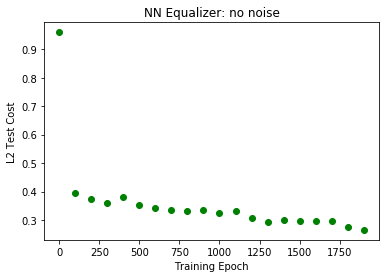

In [4]:
plt.figure()

# real components
data_est_test_real = np.zeros((num_test,data_length+1))
data_est_test_img = np.zeros((num_test,data_length+1))

# start the session
with tf.Session() as sess:
    #    initialize the variables
    sess.run(init_op)
    mc_losses = []
    
    for epoch in range(epochs):
        
        current_start = epoch*batch_size
        channel_train_batch = channel_train[current_start:(current_start+batch_size),:]
        data_train_batch = data_train_real[current_start:(current_start+batch_size),:]
        data_train_orig_batch = data_train_orig_real[current_start:(current_start+batch_size),:]
        
        # begin in state of all zeros
        begin_state = np.zeros((batch_size, state_size))
        
#         print(data_train_batch.shape)
#         print(channel_train_batch.shape)
#         print(data_train_orig_batch.shape)
#         print(begin_state.shape)
        _,cost,est_data_batch = sess.run([optimizer, estimation_cost, est_data_series], 
                                          feed_dict={batch_data_placeholder: data_train_batch, 
                                                     channel: channel_train_batch,
                                                     batch_dataorig_placeholder: data_train_orig_batch,
                                                     init_state: begin_state})    

        if epoch % 100 == 0: 
            
            
            mc_cost, mc_estimation = sess.run([estimation_cost, est_data_series], 
                                             feed_dict={batch_data_placeholder: data_test_real, 
                                                        channel: channel_test,
                                                        batch_dataorig_placeholder: data_test_orig_real,
                                                        init_state: begin_state})
            
            
#             plt.plot(epoch, mc_cost, 'bo')
#             plt.plot(epoch, zero_force_error, 'ro')
#             plt.plot(epoch, mse_error, 'go')
            print('Epoch {}, Train Cost {}, Test Cost: {}'.format(epoch, cost, mc_cost))
            plt.plot(epoch,cost,'go')
#             print('Epoch {}, Train Cost {}'.format(epoch, cost))
    
    
    plt.xlabel('Training Epoch')
    plt.ylabel('L2 Test Cost')
    plt.title('NN Equalizer: no noise')
    # plt.text(1000, .025, r'NN equalizer')
    # plt.text(0.5, .025, r'Zero Force equalizer')
    plt.show()
    
    
    # test over unit circle
    est_cost_real,est_test_real = sess.run([estimation_cost,est_data_series], 
                             feed_dict={batch_data_placeholder: data_qpsk_real, 
                                        channel: channel_qpsk,
                                        batch_dataorig_placeholder: qpsk_test_real,
                                        init_state: begin_state})
    
    est_cost_img,est_test_img = sess.run([estimation_cost,est_data_series], 
                             feed_dict={batch_data_placeholder: data_qpsk_img, 
                                        channel: channel_qpsk,
                                        batch_dataorig_placeholder: qpsk_test_img,
                                        init_state: begin_state})

In [5]:
print(np.array(est_test_real).shape)

print(np.array(est_test_real)[:,0])
print(qpsk_test_real[0,:])
print(np.array(est_test_real)[:,0]-qpsk_test_real[0,:])

(201, 100)
[ 0.7404611   0.65406024  0.6443304   0.7712875   0.7339838   0.6843706
  0.46328458  0.6808792   0.5401992   0.7127062   0.68801427  0.70898837
  0.72157896  0.67775834  0.6316563   0.57947385  0.76879364  0.75667876
  0.62588876  0.84741294  0.6951271   0.6683164   0.43284056  0.54768586
  0.7103264   0.9145459   0.5221615   0.89468014  0.6527341   0.7501931
  0.53330594  0.56794953  0.219493    0.14344762  0.2009279   0.35673776
  0.14008406 -0.05078236 -0.01977221  0.05376032  0.04274279  0.13405016
 -0.03660239  0.09399964  0.1431371   0.4499306  -0.15067947  0.01187103
  0.14658125  0.43769792  0.11956304  0.44444364  0.15216728  0.07734752
  0.2756124   0.29249835  0.30980578  0.31972963 -0.02205667  0.1375913
  0.22128417  0.6857147   0.49428594  0.2737347   0.17927003  0.1312018
 -0.05912852 -0.0871677   0.15860255  0.05019191 -0.10634317 -0.0707637
  0.0133438  -0.10056937 -0.04054496 -0.06074206  0.07537027 -0.11076149
 -0.10209857 -0.21561986  0.11147585 -0.04516

Visualize how the equalizer handles CFO

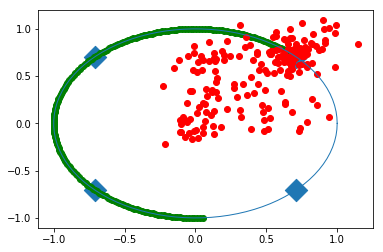

In [6]:
plt.figure()
    
# plot starting points
plt.scatter(qpsk[:,0],qpsk[:,1],marker='D',s=250)

for j in range(data_length):
    plt.plot(qpsk_test_real[0,j],qpsk_test_img[0,j],'go')
    plt.plot(np.array(est_test_real)[j,0],np.array(est_test_img)[j,0],'ro')

# plot unit circle
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), linewidth=1)

plt.show()

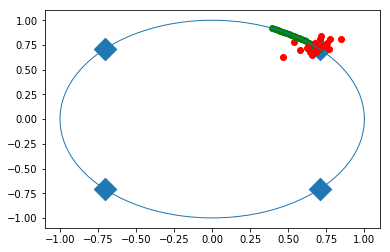

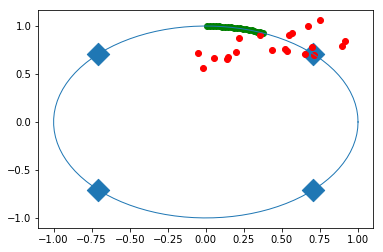

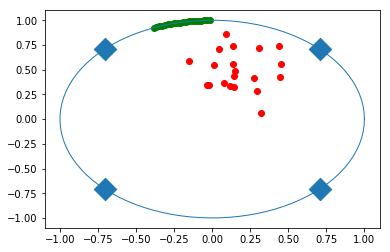

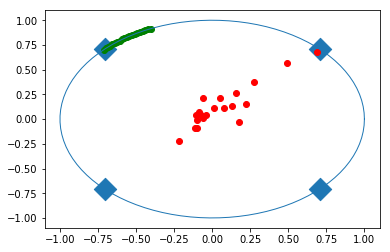

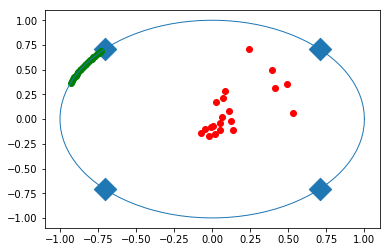

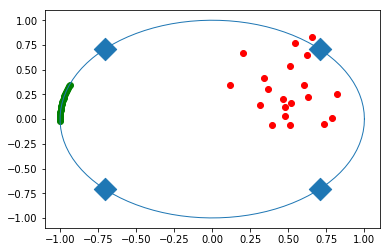

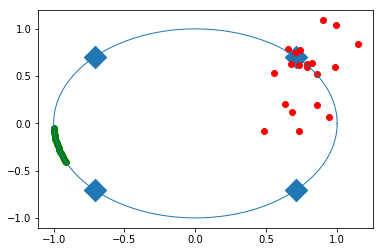

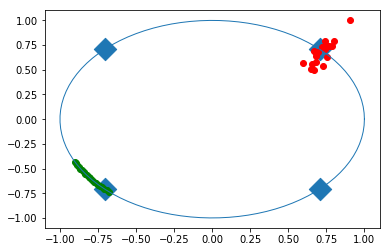

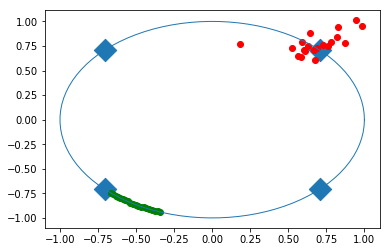

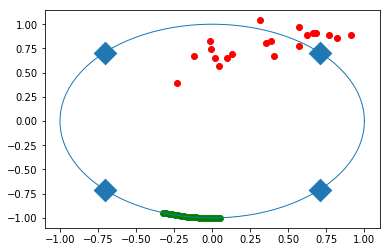

In [9]:
splits = 10
interval = data_length//splits
for m in range(0,splits):
    plt.figure()

    # plot starting points
    plt.scatter(qpsk[:,0],qpsk[:,1],marker='D',s=250)
    
    start = m*interval
    
    for j in range(interval):
        if j<data_length+1:
            plt.plot(qpsk_test_real[0,start+j],qpsk_test_img[0,start+j],'go')
            plt.plot(np.array(est_test_real)[start+j,0],np.array(est_test_img)[start+j,0],'ro')
            
    # plot unit circle
    t = np.linspace(0,np.pi*2,100)
    plt.plot(np.cos(t), np.sin(t), linewidth=1)

    plt.show()

In [8]:
qpsk_test_real.shape

(100, 201)